In [1]:
import sys
import time
import torch
from torch import optim
import torch.nn as nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision.transforms import transforms


In [2]:
data = MNIST("C:/Users/rjdis/OneDrive/Documents/GitHub/research/src/data", train=True, transform=transforms.ToTensor(), download=False)
trainloader = DataLoader(data, batch_size=32, shuffle=False)

Defining Model

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*4*4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 16)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16*4*4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:


loss_lists = []
for d in range(5):
    model = Net()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(device)
    model.to(device)
    # model_save_path = f"""./artifacts/exported/cnn/{device}_pytorch_{dt.datetime.now().strftime('%Y%m%d_%H%M%S')}.pth"""
    # print(f"Model will be saved to: {model_save_path}")
    # os.makedirs(os.path.dirname(model_save_path), exist_ok=True)
    criterion = nn.CrossEntropyLoss()
    lr = 1 / 10 ** d
    optimizer = optim.SGD(model.parameters(), lr, momentum=0.9)

    running_loss_list = []
    loss_list = []
    train_start = time.time()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        if i >= 1000:
            break
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        loss_list.append(loss.item())
        if i % 800 == 799:
            print('[%5d] loss: %.3f' %
                (i + 1, running_loss / 800)
            )
            running_loss_list.append(running_loss)
            running_loss = 0.0
    loss_lists.append(loss_list)
        

cuda
[  800] loss: 2.360
cuda
[  800] loss: 1.192
cuda
[  800] loss: 0.524
cuda
[  800] loss: 2.311
cuda
[  800] loss: 2.768


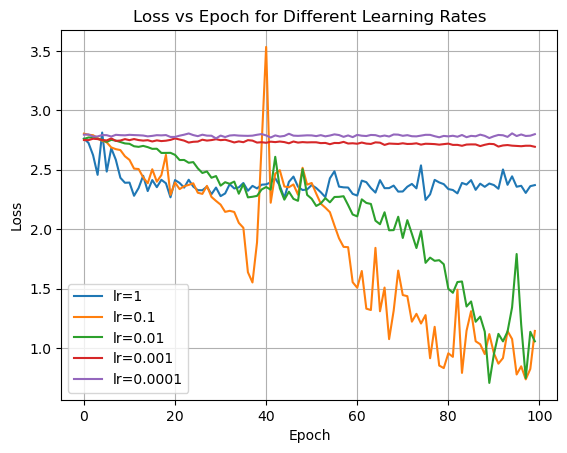

In [23]:
import matplotlib.pyplot as plt

lrs = [1, 0.1, 0.01, 0.001, 0.0001]

for loss, lr in zip(loss_lists, lrs):
    plt.plot(range(100), loss[:100], label=f"lr={lr}")

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch for Different Learning Rates")
plt.legend()
plt.grid(True)
plt.show()

In [17]:
avg = sum(loss_lists[0])/ len(loss_lists[0])
for i in range(len(loss_lists[0])):
    if loss_lists[0][i] > 3:
       loss_lists[0][i] = avg